In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from splinter import Browser
from bs4 import BeautifulSoup as bs
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
# Reference the file where the CSV is located
accidental_deaths_csv_path = "Resources/accidental_deaths.csv"

# Import the data into a Pandas DataFrame
accidental_deaths_df = pd.read_csv(accidental_deaths_csv_path)
accidental_deaths_df

,Incident ID,Month,Year,State,City Or County,Address,# Killed,# Injured,Operations
0,2022551,6,2021,Illinois,Joliet,201 S Eastern Ave,1,0,NaN
1,2022188,6,2021,Texas,Lumberton (Rose Hill Acres),4940 US 69,1,0,NaN
2,2021159,5,2021,Kentucky,Radcliff,NaN,1,0,NaN
3,2022433,5,2021,Pennsylvania,Coatesville,300 block of Community Ln,1,0,NaN
4,2019036,5,2021,Georgia,Jackson,School St,1,1,NaN
...,...,...,...,...,...,...,...,...,...
1995,784473,2,2017,Colorado,Pueblo,4103 N Elizabeth St,1,0,NaN
1996,783782,2,2017,Tennessee,Clifton,2373 Culps Bend Road,1,0,NaN
1997,783373,2,2017,Georgia,Grovetown,Coventry Avenue,1,0,NaN
1998,787701,2,2017,Minnesota,Sebeka,NaN,1,0,NaN


In [3]:
death_counts = accidental_deaths_df.set_index('State')
death_counts

,Incident ID,Month,Year,City Or County,Address,# Killed,# Injured,Operations
State,,,,,,,,
Illinois,2022551,6,2021,Joliet,201 S Eastern Ave,1,0,NaN
Texas,2022188,6,2021,Lumberton (Rose Hill Acres),4940 US 69,1,0,NaN
Kentucky,2021159,5,2021,Radcliff,NaN,1,0,NaN
Pennsylvania,2022433,5,2021,Coatesville,300 block of Community Ln,1,0,NaN
Georgia,2019036,5,2021,Jackson,School St,1,1,NaN
...,...,...,...,...,...,...,...,...
Colorado,784473,2,2017,Pueblo,4103 N Elizabeth St,1,0,NaN
Tennessee,783782,2,2017,Clifton,2373 Culps Bend Road,1,0,NaN
Georgia,783373,2,2017,Grovetown,Coventry Avenue,1,0,NaN


In [4]:
death_counts_state = death_counts.groupby(['State', 'Year'])
death_counts_state

sum_death = death_counts_state.sum()
sum_death

Incident ID  Month  # Killed  # Injured  Operations
State     Year                                                     
Alabama   2017     12972655    117        14          1         0.0
          2018     20340358     99        18          4         0.0
          2019     28551827    120        20          6         0.0
          2020     32407378    109        19          6         0.0
          2021      9879222     19         5          5         0.0
...                     ...    ...       ...        ...         ...
Wisconsin 2018      8843073     49         7          0         0.0
          2019     11734454     61         8          0         0.0
          2020     13949580     54         8          0         0.0
          2021      3956994      8         2          0         0.0
Wyoming   2020      1862872     11         1          0         0.0

[220 rows x 5 columns]

In [5]:
YearCount = death_counts['Year'].value_counts()
YearCount

2020    587
2019    408
2018    399
2017    399
2021    207
Name: Year, dtype: int64

In [6]:
State_counts_death = accidental_deaths_df['State'].value_counts()
State_counts_death

Texas                   237
Florida                 119
Georgia                 100
Tennessee                95
Ohio                     93
Illinois                 79
Alabama                  76
Missouri                 72
Michigan                 70
Louisiana                67
Pennsylvania             65
Mississippi              65
Indiana                  62
California               59
South Carolina           58
Virginia                 56
North Carolina           52
New York                 51
Arizona                  46
Kentucky                 44
Oklahoma                 37
Arkansas                 34
Washington               33
Wisconsin                31
Colorado                 28
Minnesota                25
Kansas                   25
Maryland                 22
Oregon                   18
Iowa                     18
West Virginia            17
Utah                     16
Nevada                   16
New Mexico               13
Nebraska                 13
Montana             

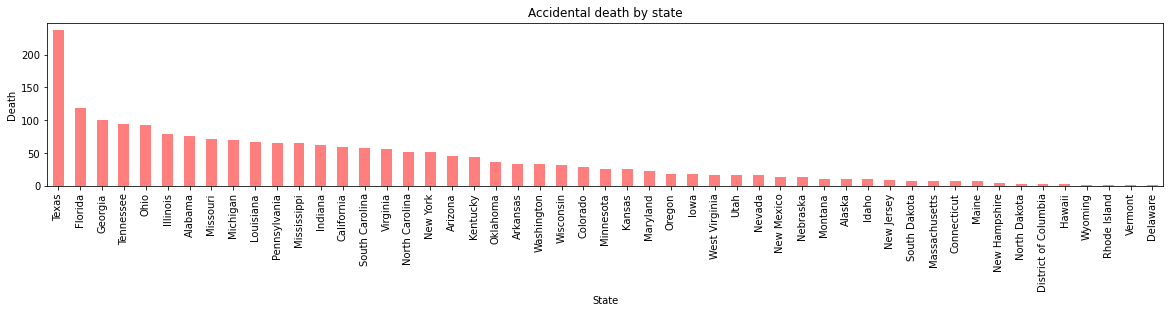

In [7]:
State_counts_death.plot(kind='bar', alpha = 0.5, align = "center", color ="red", figsize=(20,3))

plt.xlabel("State")
plt.ylabel("Death")
plt.title("Accidental death by state")

# Save the figure
plt.savefig("Bar Chart of Accidental death by state.png")
plt.show()

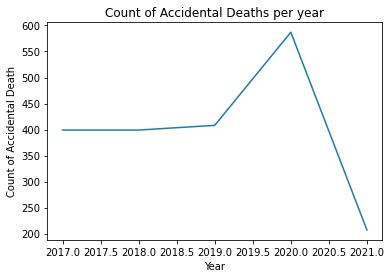

In [8]:
accidental_deaths_df = accidental_deaths_df.groupby('Year')['State'].count().plot(kind = 'line')
plt.xlabel("Year")
plt.ylabel("Count of Accidental Death")
plt.title("Count of Accidental Deaths per year")
# Save the figure
plt.savefig("Line Graph for number of Accidental Deaths per year.png")
plt.show()

In [23]:
death_counts_state_2020 = death_counts.groupby(['Year', 'State'])
death_counts_state_2020

sum_death_2020 = death_counts_state_2020.sum()
sum_death_2020

Incident ID  Month  # Killed  # Injured  Operations
Year State                                                             
2017 Alabama           12972655    117        14          1         0.0
     Alaska             2847384     29         3          0         0.0
     Arizona            6344774     52         7          0         0.0
     Arkansas           7832204     53         9          0         0.0
     California         6216165     47         7          0         0.0
...                         ...    ...       ...        ...         ...
2021 Vermont            1969109      4         1          0         0.0
     Virginia          13772136     23         8          3         0.0
     Washington         5864766      8         3          0         0.0
     West Virginia      5935612     12         3          0         0.0
     Wisconsin          3956994      8         2          0         0.0

[220 rows x 5 columns]

In [24]:
sum_death_2020 = sum_death_2020.loc[(sum_death_2020["Year"] == "2020"), :]
sum_death_2020

KeyError: 'Year'

In [ ]:
# Reference the file where the CSV is located
accidental_injuries_csv_path = "Resources/accidental_injuries.csv"

# Import the data into a Pandas DataFrame
accidental_injuries_df = pd.read_csv(accidental_injuries_csv_path)
accidental_injuries_df

In [ ]:
YearCount2 = accidental_injuries_df["Year"].value_counts()
YearCount2

In [ ]:
State_count_injuries = accidental_injuries_df['State'].value_counts()
State_count_injuries.head()

In [ ]:
x_axis = ["2020","2021"]
y_axis = accidental_injuries_df["Year"].value_counts()
plt.bar(x_axis, y_axis)
plt.xlabel("Year")
plt.ylabel("Accidental Injuries")
plt.title("Accidental Injuries Per Year")
plt.show()

In [ ]:
State_count_injuries.plot(kind='bar', alpha = 0.5, align = "center", color ="red", figsize=(20,3))

plt.xlabel("State")
plt.ylabel("Injuries")
plt.title("Accidental Injuries by state")

# Save the figure
plt.savefig("Bar Chart of Accidental Injuries by state.png")
plt.show()